In [1]:
import numpy as np
from scipy.io import loadmat
import sklearn.preprocessing
import matplotlib

# Loading data
# mnist_raw = np.array(loadmat("hw3_mnist_dist/train.mat").get('trainX'))
# mnist_test = np.array(loadmat("hw3_mnist_dist/test.mat").get('testX'))
# np.random.shuffle(mnist_raw)

spam = loadmat("dist/spam_data.mat")
spam_train_data = spam.get('training_data')
spam_train_labels = spam.get('training_labels')
spam_test_data = spam.get('test_data')

print(spam_train_data.shape)
print(spam_train_labels.shape)
spam_raw = np.array(np.concatenate((spam_train_data, spam_train_labels.T), axis=1))
np.random.shuffle(spam_raw)

# Contrast-normalizing images
# print(mnist_raw.shape)
# print(mnist_raw[:, 784])

# mnistX = mnist_raw[10000:, :784]
# mnistY = mnist_raw[10000:, 784]

# mnist_validX = mnist_raw[:10000, :784]
# mnist_validY = mnist_raw[:10000, 784]

# # print(mnistX[1])
# mnistX = sklearn.preprocessing.normalize(mnistX)
# mnist_validX = sklearn.preprocessing.normalize(mnist_validX)
# # print(mnistX[1])


(23702, 32)
(1, 23702)


In [7]:
mnist_raw[:,:mnist_raw.shape[1] - 1].shape
mnist_raw[:, mnist_raw.shape[1] - 1].shape

(60000,)

In [112]:
np.random.shuffle(spam_raw)

In [136]:
# Helper Functions!!!
def lda(u_c, precision, x, pi_c):
    a = u_c.T.dot(precision).dot(x)
    b = -0.5*u_c.T.dot(precision).dot(u_c)
    c = np.log(pi_c)
    return a+b+c

def priors(y, c):
    return np.count_nonzero(y==c)/len(y)

def qda(u_c, logdet, precision, x, pi_c):
    a = -0.5*(x-u_c).T.dot(precision).dot(x-u_c)
    b = -0.5*logdet
    c = np.log(pi_c)
    return a+b+c

    

In [39]:
# Finding means and covs for each digit
u_c = [np.mean(mnistX[mnistY == c], axis = 0) for c in range(10)]
cov_c = [np.cov(mnistX[mnistY == c], rowvar = False) for c in range(10)]


In [169]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd


<function matplotlib.pyplot.show>

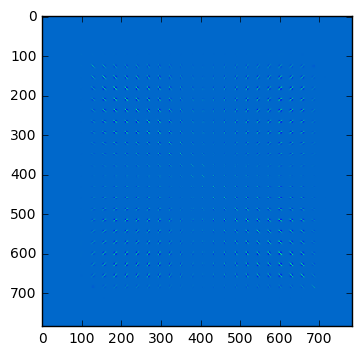

In [40]:
plt.imshow(cov_c[1], cmap = 'winter', interpolation = 'nearest')
plt.show

In [80]:
mnist_training_sizes = [99, 199, 499, 999, 1999, 4999, 9999, 29999, 49999]
mnist_train_error = [0, 0, 0, 0, 0, 0, 0, 0, 0]
mnist_error = [0, 0, 0, 0, 0, 0, 0, 0, 0]

In [54]:
avg_cov = cov_c[0]

for i in range(1,10):
    avg_cov = np.add(avg_cov, cov_c[i])

avg_cov = avg_cov / 10

avg_cov = np.add(avg_cov, np.identity(784)/10000)
precision = np.linalg.inv(avg_cov)    


In [106]:
# LDA!

print(mnistX.shape)
for i in range(0, 9):
    train = mnistX[:mnist_training_sizes[i],:]
    label = mnistY[:mnist_training_sizes[i]]
    
    # Inner loop performs LDA on each 
    u_c = [np.mean(train[label == c], axis = 0) for c in range(10)]
    cov_c = [np.cov(train[label == c], rowvar = False) for c in range(10)]
    avg_cov = cov_c[0]
    
    for j in range(1, 10): 
        avg_cov = np.add(avg_cov, cov_c[j])
        
    avg_cov = np.add(avg_cov, np.identity(784)/10000)
    avg_cov = avg_cov / 10
    precision = np.linalg.inv(avg_cov)
    
    wrong = 0
    for k in range(len(mnist_validX)):
        guess = np.argmax([lda(u_c[c], precision, mnist_validX[k,], priors(mnistY, c)) for c in range(10)])
        if guess != mnist_validY[k]:
            wrong += 1
    
    mnist_error[i] = wrong / len(mnist_validX)

    

(50000, 784)


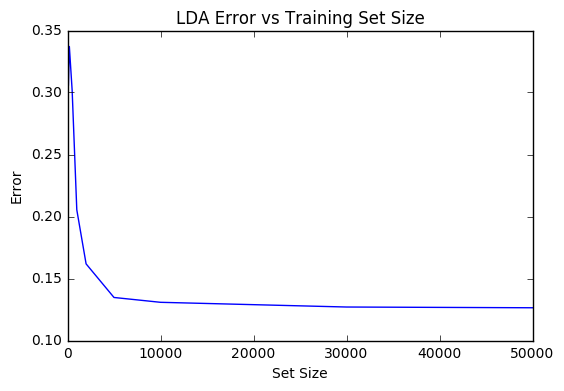

In [174]:
mnist_error
plt.plot(mnist_training_sizes, mnist_error, 'b-')
plt.ylabel('Error')
plt.xlabel('Set Size')
plt.title('LDA Error vs Training Set Size')
plt.show()


In [146]:
## QDA!

mnist_qda_error = [0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(0, 9):
    train = mnistX[:mnist_training_sizes[i],:]
    label = mnistY[:mnist_training_sizes[i]]
    
    # Inner loop performs LDA on each 
    u_c = [np.mean(train[label == c], axis = 0) for c in range(10)]
    cov_c = [np.cov(train[label == c], rowvar = False) for c in range(10)]
    precision_c = cov_c
    logdet = np.zeros(10)
    
    for j in range(10): 
        cov_c[j] = np.add(cov_c[j], np.identity(784)/10000)
        precision_c[j] = np.linalg.inv(cov_c[j])
        logdet[j] = np.linalg.slogdet(precision_c[j])[1]
            
    wrong = 0
    for k in range(10000):
        guess = np.argmax([qda(u_c[c], logdet[c], precision_c[c], mnist_validX[k,], priors(mnistY, c)) for c in range(10)])
        if guess != mnist_validY[k]:
            wrong += 1
    
    mnist_qda_error[i] = wrong / 10000


0
1
2
3
4
5
6
7
8


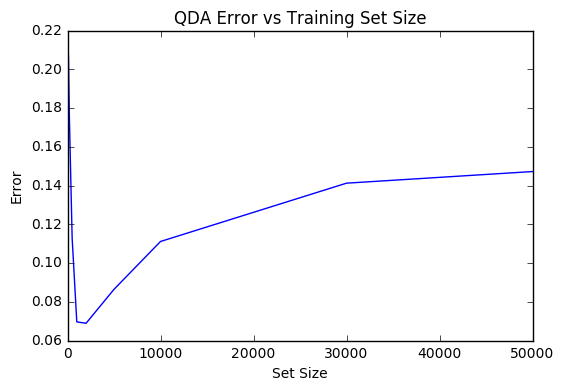

In [175]:
plt.plot(mnist_training_sizes, mnist_qda_error, 'b-')
plt.ylabel('Error')
plt.xlabel('Set Size')
plt.title('QDA Error vs Training Set Size')
plt.show()

In [ ]:
# [0.4698, 0.369, 0.221, 0.1649, 0.142, 0.1288, 0.1259, 0.1249, 0.1252]

In [170]:
# Prediction

train = mnist_raw[:, :784]
label = mnist_raw[:, 784]
test = mnist_test
    
# Perform LDA on entire training set 
u_c = [np.mean(train[label == c], axis = 0) for c in range(10)]
cov_c = [np.cov(train[label == c], rowvar = False) for c in range(10)]
avg_cov = cov_c[0]
    
for j in range(1, 10): 
    avg_cov = np.add(avg_cov, cov_c[j])
    
avg_cov = np.add(avg_cov, np.identity(784)/10000)
avg_cov = avg_cov / 10
precision = np.linalg.inv(avg_cov)

pred = np.zeros(len(mnist_test))
for k in range(len(mnist_test)):
    guess = np.argmax([lda(u_c[c], precision, mnist_test[k,], priors(label, c)) for c in range(10)])
    pred[k] = guess

d = {
    "Id": np.arange(0, len(pred)),
    "Category": pred
}
df = pd.DataFrame(data=d)
df.to_csv("mnist_predict.csv", index=False)

In [153]:
len(spam_raw[1])
len(mnist_raw[1])

785

In [159]:
spamX = spam_raw[5000:, :32]
spamY = spam_raw[5000:, 32]

spam_validX = spam_raw[:5000, :32]
spam_validY = spam_raw[:5000, 32]

spamX = sklearn.preprocessing.normalize(spamX)
spam_validX = sklearn.preprocessing.normalize(spam_validX)

train = spamX
label = spamY
    
# Inner loop performs LDA on each 
u_c = [np.mean(train[label == c], axis = 0) for c in range(2)]
cov_c = [np.cov(train[label == c], rowvar = False) for c in range(2)]
avg_cov = np.add(cov_c[0], cov_c[1]) / 2
        
avg_cov = np.add(avg_cov, np.identity(32)/10000)
precision = np.linalg.inv(avg_cov)
    
wrong = 0
for k in range(len(spam_validX)):
    guess = np.argmax([lda(u_c[c], precision, spam_validX[k,], priors(spamY, c)) for c in range(2)])
    if guess != spam_validY[k]:
        wrong += 1
    
error = wrong / len(spam_validY)

In [160]:
error
# Looks like lda does a pretty decent job on spam


0.2168

In [171]:
# Performing prediction on the test set for submission
train = spam_raw[:,:32]
label = spam_raw[:, 32]
test = spam_test_data

# Perform LDA on entire training set 
u_c = [np.mean(train[label == c], axis = 0) for c in range(2)]
cov_c = [np.cov(train[label == c], rowvar = False) for c in range(2)]
avg_cov = np.add(cov_c[0], cov_c[1]) / 2
        
avg_cov = np.add(avg_cov, np.identity(32)/10000)
precision = np.linalg.inv(avg_cov)

pred_spam = np.zeros(len(test))
for k in range(len(test)):
    guess = np.argmax([lda(u_c[c], precision, test[k,], priors(label, c)) for c in range(2)])
    pred_spam[k] = guess

d = {
    "Id": np.arange(0, len(pred_spam)),
    "Category": pred_spam
}
df = pd.DataFrame(data=d)
df.to_csv("spam_predict.csv", index=False)

In [165]:
pred_spam

array([ 0.,  1.,  1., ...,  1.,  0.,  0.])